In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("sales_data.csv")
data.head()

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
0,11/1/2024,S002,P005,92.0,1847.696,15.14,Regular
1,11/2/2024,S002,P009,79.0,844.510,8.60,Premium
2,11/3/2024,S001,P002,77.0,1847.696,13.54,Premium
3,11/4/2024,S002,P008,18.0,201.720,9.02,Regular
4,11/5/2024,S004,P007,NaN,1712.460,NaN,Premium


In [3]:
# Data Cleaning
# Handle Missing Values
for col in ['Units Sold', 'Sales Amount', 'Discount Applied']:
    data[col] = data[col].fillna(data[col].median())

# Ensure Correct Data Formats
data["Units Sold"] = data["Units Sold"].astype(int)
data["Sales Amount"] = data["Sales Amount"].astype(float)
data["Discount Applied"] = data["Discount Applied"].astype(float)

# Remove Outliers
Q1 = data[['Units Sold', 'Sales Amount', 'Discount Applied']].quantile(0.25)
Q3 = data[['Units Sold', 'Sales Amount', 'Discount Applied']].quantile(0.75)
IQR = Q3 - Q1
sales_data = data[~((data[['Units Sold', 'Sales Amount', 'Discount Applied']] < (Q1 - 1.5 * IQR)) | 
                          (data[['Units Sold', 'Sales Amount', 'Discount Applied']] > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [4]:
print("KAVIYA V - 24MAI0077\n")

# Data Aggregation
# Aggregation by Date
sales_by_date = data.groupby('Date').agg({'Sales Amount': 'sum', 'Units Sold': 'sum'}).reset_index()
print("Sales by Date\n")
print(sales_by_date)

# Aggregation by Store
sales_by_store = data.groupby('Store ID').agg({'Sales Amount': 'sum', 'Units Sold': 'mean'}).reset_index()
print("\nSales by Store\n")
print(sales_by_store)

# Aggregation by Product
sales_by_product = data.groupby('Product ID').agg({'Sales Amount': 'sum', 'Units Sold': 'mean'}).reset_index()
print("\nSales by Product\n")
print(sales_by_product)

KAVIYA V - 24MAI0077

Sales by Date

         Date  Sales Amount  Units Sold
0    1/1/2025    182.990000          13
1   1/10/2025    100.070000          71
2   1/11/2025    309.340000          48
3   1/12/2025    160.950000          62
4   1/13/2025    194.930000          45
..        ...           ...         ...
95   2/4/2025   1073.440000          27
96   2/5/2025   1782.970000          79
97   2/6/2025   1685.400000          30
98   2/7/2025    985.650000          45
99   2/8/2025    973.964787          45

[100 rows x 3 columns]

Sales by Store

  Store ID  Sales Amount  Units Sold
0     S001  20232.106787   47.347826
1     S002  29910.317574   56.035714
2     S003  18995.824362   44.050000
3     S004  28841.914362   41.689655

Sales by Product

  Product ID  Sales Amount  Units Sold
0       P001  11133.820000   32.750000
1       P002  13600.000787   55.538462
2       P003  13192.090362   44.166667
3       P004   9692.170000   55.600000
4       P005  12159.970787   51.818182
5   

KAVIYA V - 24MAI0077

Total Sales per Product
  Product ID  Sales Amount
5       P006  13997.285574
1       P002  13600.000787
2       P003  13192.090362
4       P005  12159.970787
0       P001  11133.820000
3       P004   9692.170000
7       P008   8820.030000
6       P007   8811.780787
8       P009   6573.014787

Average Sales per Product
Sales Amount    10886.68
dtype: float64

Store with Highest Sales Performance
Store ID                S002
Sales Amount    29910.317574
Units Sold         56.035714
Name: 1, dtype: object


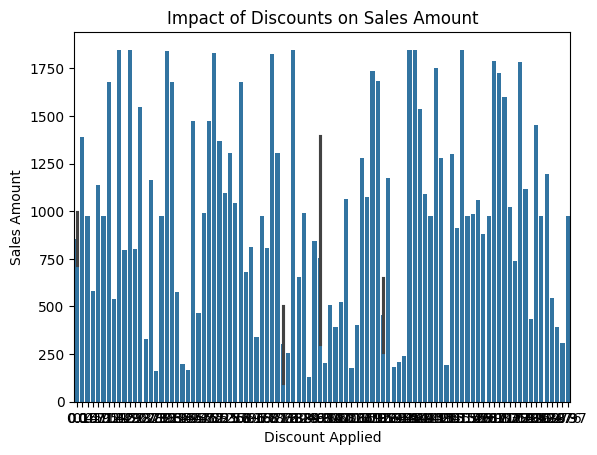

In [5]:
print("KAVIYA V - 24MAI0077\n")

# Analysis
# Total Sales and Average Sales per Product
total_sales_per_product = sales_by_product[["Product ID", "Sales Amount"]].sort_values(by="Sales Amount", ascending=False)
average_sales_per_product = sales_by_product[["Sales Amount"]].mean().round(2)
print("Total Sales per Product")
print(total_sales_per_product)
print("\nAverage Sales per Product")
print(average_sales_per_product)

# Top Performing Store
top_store = sales_by_store.loc[sales_by_store['Sales Amount'].idxmax()]
print("\nStore with Highest Sales Performance")
print(top_store)

# Discount Impact Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = data, x = 'Discount Applied', y = 'Sales Amount')
plt.title('Impact of Discounts on Sales Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Sales Amount')
plt.show()

KAVIYA V - 24MAI0077



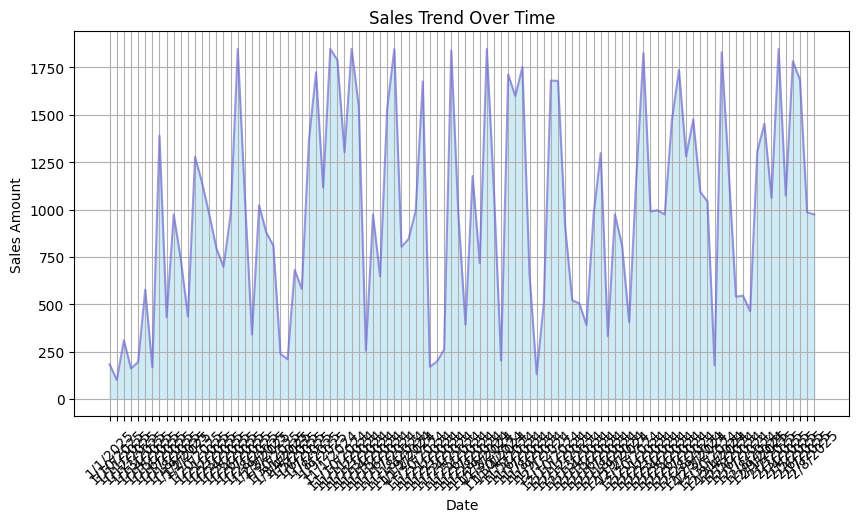

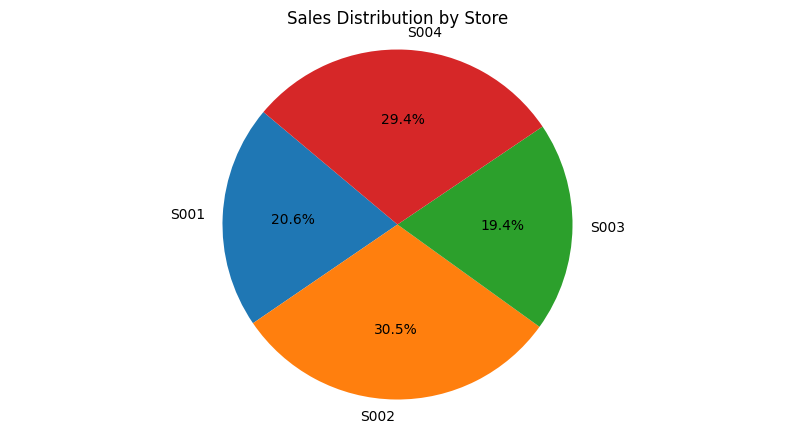

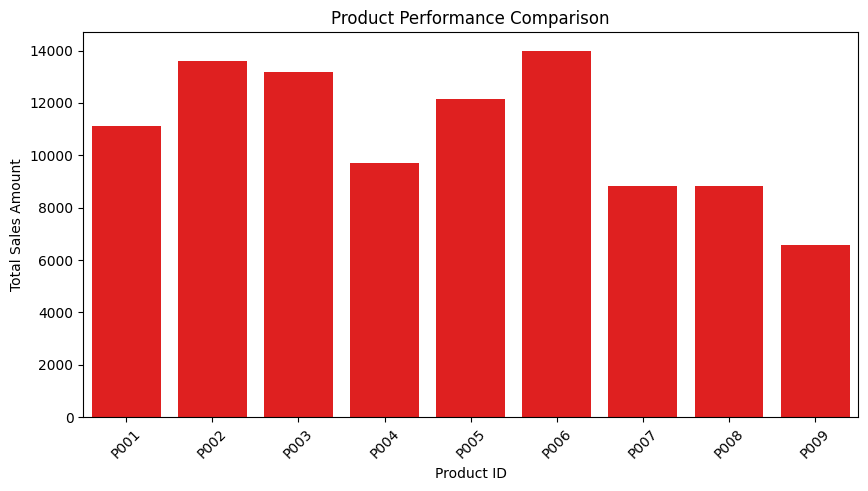

In [6]:
print("KAVIYA V - 24MAI0077\n")

# Visualization
# Sales trends over time
plt.figure(figsize = (10, 5))
plt.fill_between(sales_by_date['Date'], sales_by_date['Sales Amount'], color = 'skyblue', alpha = 0.4)
plt.plot(sales_by_date['Date'], sales_by_date['Sales Amount'], color = 'Slateblue', alpha = 0.6)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Sales distribution across stores
plt.figure(figsize = (10, 5))
plt.pie(sales_by_store['Sales Amount'], labels = sales_by_store['Store ID'], autopct = '%1.1f%%', startangle = 140)
plt.title('Sales Distribution by Store')
plt.axis('equal')
plt.show()

# Product performance comparison
plt.figure(figsize = (10, 5))
sns.barplot(data = sales_by_product, x = 'Product ID', y = 'Sales Amount', color = 'red')
plt.title('Product Performance Comparison')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation = 45)
plt.show()